In [1]:
# this notebook is to utilised fastai api to train a model on a dataset to classify cats and dogs
from fastai.vision.all import *

In [2]:
# get files from the data dir
data_dir = '/media/victoru/B612CEC512CE8A37/ai50/pytorch_test/data/cats_and_dogs_filtered'

#setting up device to run on cuda
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
# define hyperparameters
batch_size = 50
num_epochs = 3
size = 224

In [4]:
# create dataloader object
dataloader = ImageDataLoaders.from_folder(data_dir, bs=batch_size, device=device, item_tfms=Resize(size))

In [5]:
# check data
dataloader.valid_ds.items[:3]

[Path('/media/victoru/B612CEC512CE8A37/ai50/pytorch_test/data/cats_and_dogs_filtered/valid/cats/cat.2000.jpg'),
 Path('/media/victoru/B612CEC512CE8A37/ai50/pytorch_test/data/cats_and_dogs_filtered/valid/cats/cat.2001.jpg'),
 Path('/media/victoru/B612CEC512CE8A37/ai50/pytorch_test/data/cats_and_dogs_filtered/valid/cats/cat.2002.jpg')]

SuggestedLRs(valley=0.0003981071640737355)

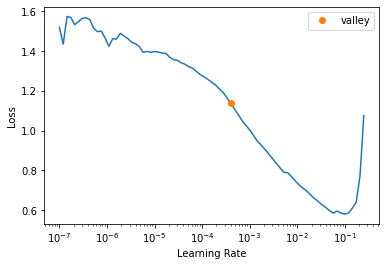

In [6]:
# define pre-trained model
learn = cnn_learner(dataloader, models.resnet34, metrics=error_rate)

# using learning rate finder to find optimal learning rate
learn.lr_find()


In [7]:
learn.fine_tune(num_epochs,0.0003981071640737355)

epoch,train_loss,valid_loss,error_rate,time
0,0.553826,0.079688,0.032000,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.130477,0.057222,0.022000,00:11
1,0.084658,0.042079,0.016000,00:10
2,0.051054,0.039828,0.017000,00:11


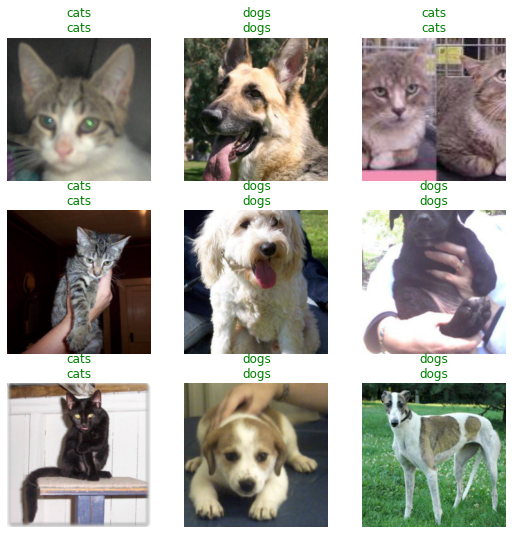

In [8]:
# make a prediction from model
learn.predict(dataloader.valid_ds.items[0])

#show model's result
learn.show_results()